In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [89]:
#Loading dataset
data= pd.read_csv('insurance.csv')
data.head()

# charges is our target feature

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
shape= data.shape
print('Shape of the data: {}'.format(shape))

print(data.dtypes)

Shape of the data: (1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [91]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
#checking duplicate observations in our data

data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [93]:
#dropping duplicate row from our data

data= data.drop_duplicates()
data.duplicated().sum()

0

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [95]:
data.isnull().sum()

#as you can see there is no null in our data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [96]:
def distplt(data):
    num=data.select_dtypes(exclude=['object'])
    for i,var in enumerate(num):
        plt.figure(figsize=(16,10))
        plt.subplot(2,2,i+1)
        sns.distplot(num[var])
        


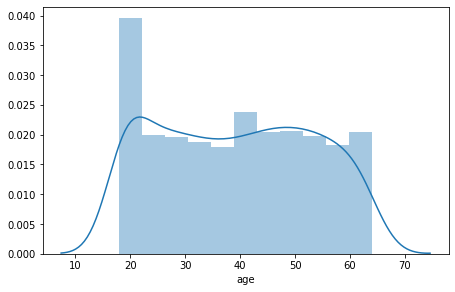

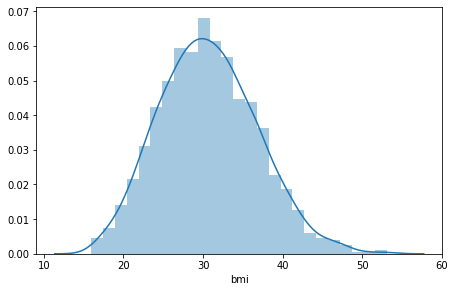

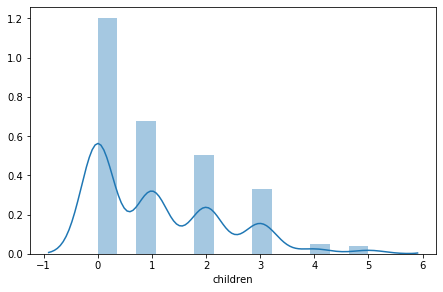

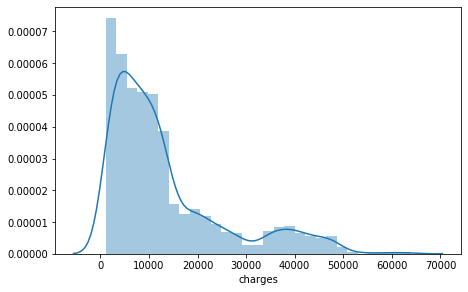

In [97]:
distplt(data)

In [98]:
def obj(df):
    ob=data.select_dtypes(include=['object'])
    for i,v in enumerate(ob):
        plt.figure(figsize=(16,10))
        plt.subplot(2,2,i+1)
        sns.barplot(x=ob[v], y=data['charges'], orient='v', palette='GnBu_d')
        


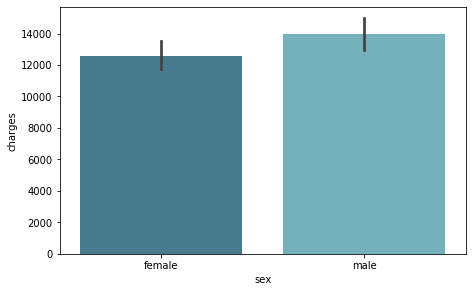

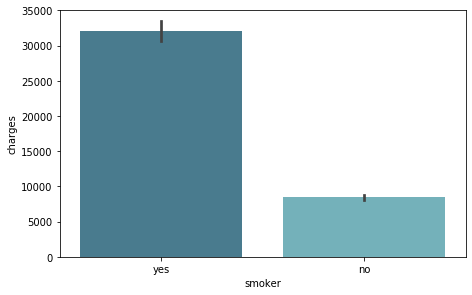

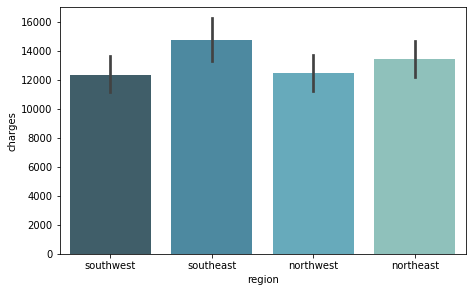

In [99]:
obj(data)

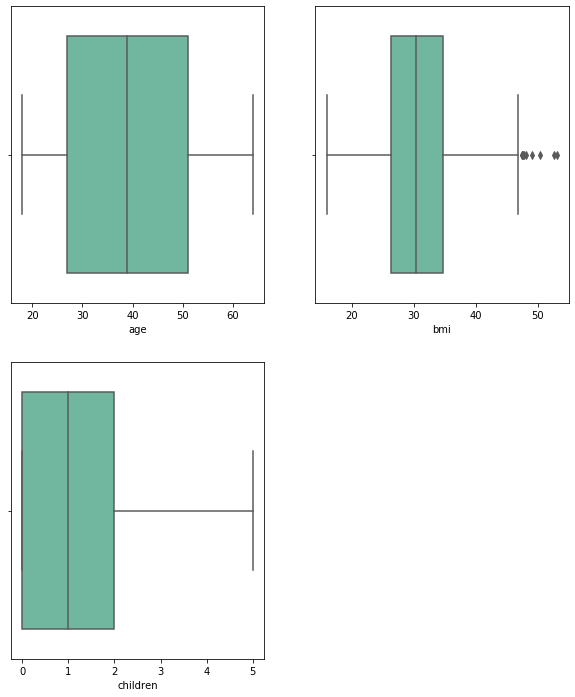

In [100]:
plt.figure(figsize=(10,12))
col=['age','bmi','children']
for i, var in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[var],palette='BuGn')

In [101]:
def outlier1(*column):
    for i in column:
        q1,q3=np.percentile(data[i],[25,75])
        iqr=q3-q1
        lower_fence=q1-(1.5*iqr)
        upper_fence=q3+(1.5*iqr)
        data[i].clip(lower_fence,upper_fence,inplace=True)
        
outlier1('bmi')

In [102]:
col= ['age','bmi','children']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data[col]=sc.fit_transform(data[col])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.454032,-0.909234,yes,southwest,16884.92400
1,-1.511647,male,0.515033,-0.079442,no,southeast,1725.55230
2,-0.799350,male,0.387915,1.580143,no,southeast,4449.46200
3,-0.443201,male,-1.311662,-0.909234,no,northwest,21984.47061
4,-0.514431,male,-0.292246,-0.909234,no,northwest,3866.85520


In [103]:
oc=['sex','smoker','region']
dummy_df=pd.get_dummies(data[oc],drop_first=True)
data=data.drop(['sex','smoker','region'],axis=1)
master=pd.concat([dummy_df,data],axis=1)

master.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,-1.440418,-0.454032,-0.909234,16884.92400
1,1,0,0,1,0,-1.511647,0.515033,-0.079442,1725.55230
2,1,0,0,1,0,-0.799350,0.387915,1.580143,4449.46200
3,1,0,1,0,0,-0.443201,-1.311662,-0.909234,21984.47061
4,1,0,1,0,0,-0.514431,-0.292246,-0.909234,3866.85520


In [104]:
X= master.drop(['charges'],axis=1)
Y=master['charges']
display('X', X.shape, 'Y', Y.shape)

'X'

(1337, 8)

'Y'

(1337,)

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(X,Y, test_size=0.3, random_state=0)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(935, 8)

(402, 8)

(935,)

(402,)

# LINEAR REGRESSION

In [106]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [107]:
regressor.fit(x_train,y_train)

LinearRegression()

In [108]:
print(regressor.intercept_)
print(regressor.coef_)

8949.648757656783
[  -79.17284981 23615.91912774  -567.91536559  -816.90652385
 -1264.27725294  3408.68180908  1809.03740939   567.44404738]


In [109]:
from sklearn.metrics import r2_score, mean_squared_error

In [111]:
#Rsq on train data
pred_x= regressor.predict(x_train)
print(r2_score(y_train,pred_x))

RMSE= np.sqrt(mean_squared_error(y_train,pred_x))
print(RMSE)

0.7426781045414591
5980.542622292729


In [113]:
# Rsq,RMSE on test data
y_pred=regressor.predict(x_test)
print(r2_score(y_test,y_pred))

RMSE= np.sqrt(mean_squared_error(y_test,y_pred))    #OR mean_squared_error(y_test,y_pred,squared=False)
print(RMSE)

0.7626972729258967
6233.8261661092565


______________*************____________________________________

In [138]:
from sklearn.linear_model import LassoCV  # used for multiple values of alpha
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV  #used for multiple values of alpha

# RIDGE

In [133]:
rr=RidgeCV(alphas=[0.5,0.1,0.3,1.0])
#fitting model
r_model=rr.fit(x_train,y_train)
#finding the best value of alpha
r_model.alpha_

In [136]:
pred_train= rr.predict(x_train)
print(r2_score(y_train,pred_train))
print(np.sqrt(mean_squared_error(y_train,pred_train)))

0.7426707967097821
5980.627544114963


In [137]:
pred_test=rr.predict(x_test)
print(r2_score(y_test,pred_test))
print(np.sqrt(mean_squared_error(y_test,pred_test)))

0.7625379544943383
6235.918423497147


# LASSO

In [143]:
ll= LassoCV(alphas=[10.0,0.3,0.5,1.0])
l_model= ll.fit(x_train,y_train)
l_model.alpha_

10.0

In [141]:
pred_train= ll.predict(x_train)
print(r2_score(y_train,pred_train))
print(np.sqrt(mean_squared_error(y_train,pred_train)))

0.7426294107111633
5981.108453955448


In [142]:
pred_test= ll.predict(x_test)
print(r2_score(y_test,pred_test))
print(np.sqrt(mean_squared_error(y_test,pred_test)))

0.7624669995831398
6236.8500165627975
